In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

### Parte 1 : Algoritimos Morfológicos

In [27]:
img = np.ones((300,300),np.uint8)
img = img*255
cv2.circle(img,(img.shape[0]//2,img.shape[1]//2),img.shape[0]//4,(0),-1);

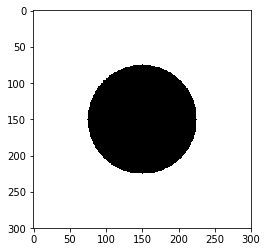

In [3]:
plt.imshow(img,cmap = 'gray')

### Extração de Fronteiras
### Preenchimento de Regiões
### Componentes Conectados
### Afinamento
### Espessamento
### Esqueletonização

### Extração de Fronteiras/Bordas


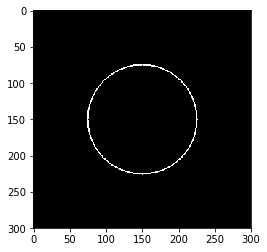

In [4]:
## Utilização do Filtro Laplaciano para a detecção de Bordas.

imgt = cv2.Laplacian(img,cv2.CV_64F) #float64 para manter os valores negativos da translação da transição branco->preto.                    
imgt = np.absolute(imgt) # Aplica o absoluto nos negativos.
imgt = np.uint8(imgt)

plt.imshow(imgt,cmap = 'gray')

### Preenchimento de Regiões

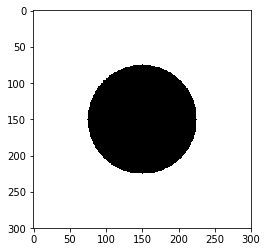

In [5]:
plt.imshow(img,cmap = 'gray')


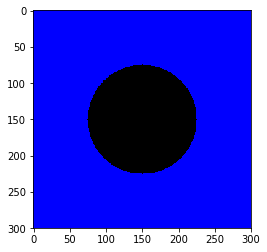

In [6]:
imgt = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#Pinta o Fundo Branco de Azul
cv2.floodFill(imgt,None,(0,0),(0,0,255))
plt.imshow(imgt)

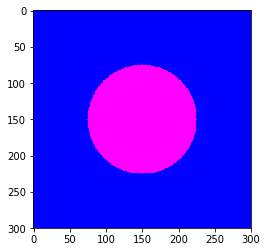

In [7]:
#Pinta a circunferência de Roxo
cv2.floodFill(imgt,None,(imgt.shape[0]//2,imgt.shape[0]//2),(255,0,255))
plt.imshow(imgt)

### Componentes Conectados

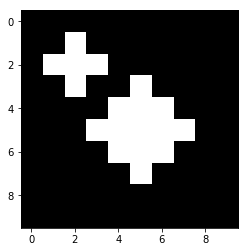

In [8]:
imcc = np.ones((10,10),np.uint8)*255
cv2.circle(imcc,(5,5),2,(0),-1)
cv2.circle(imcc,(2,2),1,(0),-1)
imcc = cv2.bitwise_not(imcc) #Negativo
plt.imshow(imcc,cmap = 'gray')

In [9]:
#Essa Função mapeia as estruturas conectadas em que ret é o número de componentes (3 -> 2 estruturas em branco e o fundo) 
#é o mapeamento 
ret,label = cv2.connectedComponents(imcc)
print(ret)
print(label)

3
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


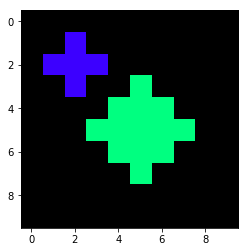

In [10]:
#Separando os Componentes da Imagem por Cores
# -> Cria 3 canais e faz o merge
lb1 = np.uint8(255*label/np.max(label))
lb2 = 255*np.ones_like(lb1)
img_lb = cv2.merge([lb1,lb2,lb2])

img_lb = cv2.cvtColor(img_lb,cv2.COLOR_HSV2RGB) 
img_lb[lb1 == 0] = 0 #-> seta background
plt.imshow(img_lb)

### Afinamento e Espessamento

#### Obs : As demonstrações iniciais são mostradas pois foram parte de um estudo profundo sobre o entendimento do funcionamento da Transformada Hit or Miss aplicada nas funções morfológicas de afinamento e espessamento

In [11]:
img = 255*np.array((
    [0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0],
    [0,1,1,1,0,0,0],
    [0,1,1,1,0,0,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,0,0],
    [0,1,1,1,1,0,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0],
    [0,0,0,0,0,0,0]),dtype = 'uint8')

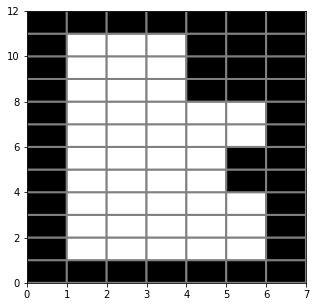

In [12]:
cmap = colors.ListedColormap(['Black','White'])
plt.figure(figsize = (5,5))
plt.pcolor(img[::-1],cmap = cmap,edgecolors = 'gray',lw = 2)

plt.show()

In [13]:
## Elementos Estruturantes para o Afinamento
B1 = np.array((
    [1,1,1],
    [0,1,0],
    [-1,-1,-1]),dtype = 'int')


B2 = np.array((
    [-1,0,0],
    [1,1,0],
    [1,1,-1]),dtype = 'int')



print(B1,'\n\n',B2)

[[ 1  1  1]
 [ 0  1  0]
 [-1 -1 -1]] 

 [[-1  0  0]
 [ 1  1  0]
 [ 1  1 -1]]


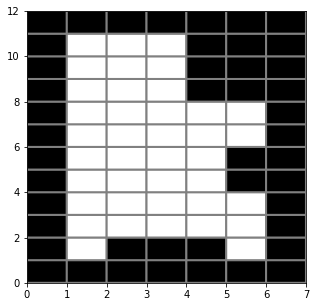

In [14]:
#Afinmaneto pelo Elemento Estruturante B1
app1 = cv2.morphologyEx(img,cv2.MORPH_HITMISS,B1)
app1 = img - app1

plt.figure(figsize = (5,5))
plt.pcolor(app1[::-1],cmap = cmap ,edgecolors = 'gray',lw = 2)

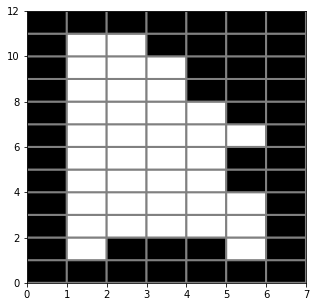

In [15]:
#Afinamento do resultado app1 pelo Elemento Estruturante B2
app2 = cv2.morphologyEx(app1,cv2.MORPH_HITMISS,B2)
app2 = app1 - app2


plt.figure(figsize = (5,5))
plt.pcolor(app2[::-1],cmap = cmap , edgecolors = 'gray', lw = 2)

In [16]:
img2 = 255*np.array((
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,1,1,1,1,0],
    [0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,1,1,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,1,1,0,0],
    [0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0]),dtype = 'uint8')

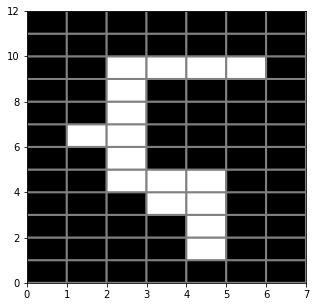

In [17]:
cmap = colors.ListedColormap(['Black','White'])
plt.figure(figsize = (5,5))
plt.pcolor(img2[::-1],cmap = cmap,edgecolors = 'gray',lw = 2)


In [18]:
#Elementos Estruturantes para o Espessamento
C1 = np.array((
    [-1,-1,-1],
    [0,-1,0],
    [1,1,1]),dtype = 'int')

C2 = np.array((
    [0,1,1],
    [-1,-1,1],
    [-1,-1,0]),dtype ='int')

print(C1,'\n\n',C2)

[[-1 -1 -1]
 [ 0 -1  0]
 [ 1  1  1]] 

 [[ 0  1  1]
 [-1 -1  1]
 [-1 -1  0]]


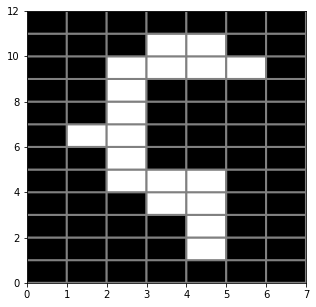

In [19]:
app3 = cv2.morphologyEx(img2,cv2.MORPH_HITMISS,C1,borderType = cv2.BORDER_REFLECT)
app3 =  np.bitwise_or(app3,img2)

plt.figure(figsize = (5,5))
plt.pcolor(app3[::-1],cmap = cmap,edgecolors = 'gray', lw = 2)

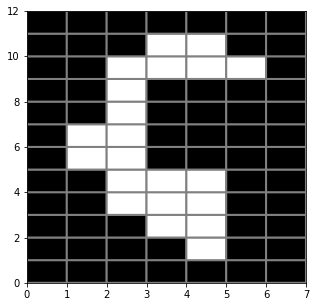

In [20]:
app4 = cv2.morphologyEx(app3,cv2.MORPH_HITMISS,C2,borderType = cv2.BORDER_REFLECT)
app4 = np.bitwise_or(app4,app3)

plt.figure(figsize = (5,5))
plt.pcolor(app4[::-1],cmap = cmap,edgecolors = 'gray', lw = 2)

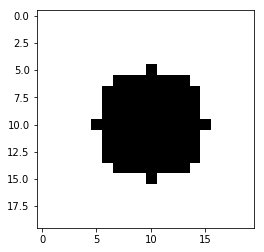

In [21]:
#Executando a Célula da imagem original e plotando a imagem
img = np.ones((20,20),np.uint8)
img = img*255
cv2.circle(img,(img.shape[0]//2,img.shape[1]//2),img.shape[0]//4,(0),-1);
plt.imshow(img,cmap = 'gray')

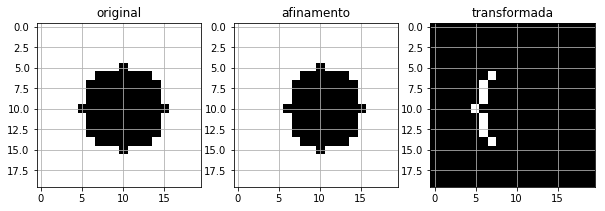

In [22]:
#Afinamento à esquerda
kernel = np.array((
    [0,0,0],
    [1,-1,-1],
    [0,0,0]),dtype = 'int')


afin = cv2.morphologyEx(img,cv2.MORPH_HITMISS,kernel)

rafin = img + afin  #Note que o operador será + pois as cores são invertidas em relação ao default) 


plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('original')
plt.grid()

plt.subplot(1,3,2)
plt.imshow(rafin,cmap = 'gray')
plt.title('afinamento')
plt.grid()

plt.subplot(1,3,3)
plt.imshow(afin,cmap = 'gray')
plt.title('transformada')
plt.grid()

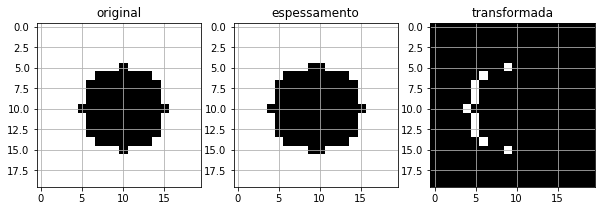

In [23]:
#Espessamento à Esquerda
kernel = np.array((
    [0,0,0],
    [1,1,-1],
    [0,0,0]),dtype = 'int')

esp = cv2.morphologyEx(img,cv2.MORPH_HITMISS,kernel,borderType = cv2.BORDER_REFLECT)
resp = img - esp #Note novamente o sinal invertido devido as cores invertidas

plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('original')
plt.grid()

plt.subplot(1,3,2)
plt.imshow(resp,cmap = 'gray')
plt.title('espessamento')
plt.grid()

plt.subplot(1,3,3)
plt.imshow(esp,cmap = 'gray')
plt.title('transformada')
plt.grid()

### Esqueletonização

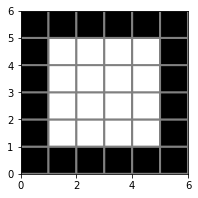

In [24]:
img = 255*np.array((
    [0,0,0,0,0,0],
    [0,1,1,1,1,0],
    [0,1,1,1,1,0],
    [0,1,1,1,1,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]),dtype = 'uint8')

plt.figure(figsize = (3,3))
plt.pcolor(img[::-1],cmap = cmap, edgecolors = 'gray', lw = 2)

In [25]:
#Função de Esqueletonização
def esqueleto(img):
    esq = np.zeros_like(img)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    
    while True :
        open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations = 1)
        dif = img - open 
        esq = np.bitwise_or(esq,dif)
        
        img = cv2.morphologyEx(img,cv2.MORPH_ERODE,kernel,iterations =1)
        
        if cv2.countNonZero(img) == 0 :
            break
    return esq

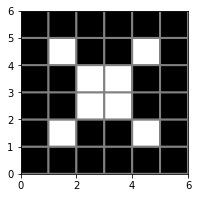

In [26]:
esq = esqueleto(img)

plt.figure(figsize = (3,3))
plt.pcolor(esq[::-1],cmap = cmap,edgecolors = 'gray',lw = 2)

Text(0.5, 1.0, 'esqueleto')

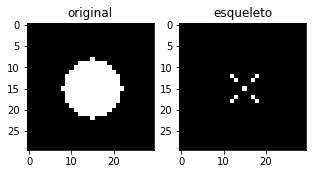

In [28]:
#Aplicando na Imagem da Tarefa
img = np.ones((30,30),np.uint8)
img = img*255
cv2.circle(img,(img.shape[0]//2,img.shape[1]//2),img.shape[0]//4,(0),-1);

img = np.bitwise_not(img)
esq = esqueleto(img)

plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(esq,cmap =  'gray')
plt.title('esqueleto')

### Parte 2 : Extração dos caracteres da placa

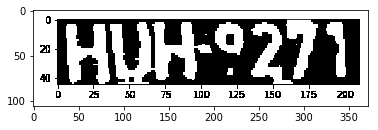

In [29]:
img = cv2.imread('imgproc.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.imshow(img,cmap = 'gray')

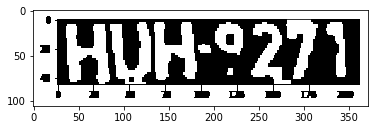

In [30]:
#Tomei como necessário aplicar mais uma abertura para separar o U do H
kernel = np.ones((3,3))
open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations = 1)
plt.imshow(open,cmap = 'gray')

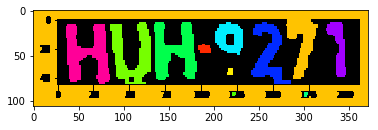

In [31]:
#Caracteres representados por Cores diferentes

ret,label = cv2.connectedComponents(open)
lb1 = np.uint8(255*label/np.max(label))
lb2 = 255*np.ones_like(lb1)
img_lb = cv2.merge([lb1,lb2,lb2])

img_lb = cv2.cvtColor(img_lb,cv2.COLOR_HSV2RGB) 
img_lb[lb1 == 0] = 0 #-> seta background
plt.imshow(img_lb)